## Clasificación de Iconos mediante redes neuronales

Se importan todas las librerias que son necesarias para realizar este proyecto, cada una de ellas es importante pero las más importantes para la creación de la RNA son: **Keras** y **TensorFlow**


### Importamos las librerias

In [75]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sb
import os
import re
import matplotlib.pyplot as pp
from itertools import repeat
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A3

%matplotlib inline

In [76]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten


### Cargamos el corpus de datos
Cargamos los datos  mediante el método **plt.imread(filepath)** que cargará a memoria en un array todas las imagenes.

In [77]:
dirname = os.path.join('corpus')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = pp.imread(filepath)
            images.append(image)
            if prevRoot !=root:
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
## Se cargan los íconos y las categorías
iconos = np.load('./corpus.npy', allow_pickle = True).item()
x = np.array(iconos['image'])
y = np.array(iconos['class'])
categorias = os.listdir('./corpus')

leyendo imagenes de  corpus\
Directorios leidos: 6
Imagenes en cada directorio [2267, 2376, 2189, 2398, 2266, 2507]


### Asignacion de categorias

In [78]:
#Cargamos las categorías en orden alfabético
lista_categorias = os.listdir('./corpus')
lista_categorias.sort(key = str.lower)

#Visualizamos las categorías de mejor manera mediante un Dataframe
categorias = pd.DataFrame(lista_categorias)
categorias

,0
0,bosque
1,calle
2,edificios
3,glacial
4,mar
5,montaña


### Division de las muestras de entrenamiento y prueba

In [79]:
## Se redimensiona la matriz 3d de las imágenes a una matriz 2d
def redimensionar2d(x):
    return x.reshape(1,-1)
def redimensionar1d(x):
    return x.reshape(3072)
    
x = np.array(list(map(redimensionar2d,x)))
x = np.array(list(map(redimensionar1d,x)))

## Se reserva el 30% del corpus para una prueba externa posterior
x_externo = pd.DataFrame(x[8000:len(x)])
y_externo = pd.DataFrame(y[8000:len(y)])
x_externo[3072] = y_externo
x_externo.to_csv('prueba.data', sep = ',', index = False)


### Division del corpus de imagenes en dos bloques de entrenamiento (train) y pruebas(test)

In [80]:

## Se realiza la division de los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, stratify = y,random_state = 251)

## Se convierten los datos en arrays y se obtiene su transpuesta
y_train = np.array([y_train])
y_train = np.array(list(map(lambda x: np.array(x), y_train))).T

y_test = np.array([y_test])
y_test = np.array(list(map(lambda x: np.array(x), y_test))).T

## Normalizamos los datos
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

### Creacion de modelos de  RNA

In [84]:
# Modelo 1
modelo1 = Sequential()
modelo1.add(Dense(50, activation = 'sigmoid', input_shape = (150,150,3 )))
modelo1.add(Dense(50, activation = 'relu'))
modelo1.add(Dense(50, activation = 'sigmoid'))

#Modelo 2
modelo2 = Sequential()
modelo2.add(Dense(100, activation = 'relu', input_shape = (150,150,3 )))
modelo2.add(Dense(100, activation = 'exponential'))
modelo2.add(Dense(50, activation = 'sigmoid'))

#Modelo 3
modelo3 = Sequential()
modelo3.add(Dense(150, activation = 'relu', input_shape = (150,150,3 )))
modelo3.add(Dense(50, activation = 'relu'))
modelo3.add(Dense(50, activation = 'exponential'))

#Modelo 4
modelo4 = Sequential()
modelo4.add(Dense(50, activation = 'sigmoid', input_shape = (150,150,3 )))
modelo4.add(Dense(100, activation = 'exponential'))
modelo4.add(Dense(50, activation = 'exponential'))

### Entrenamiendo de modelos (Modelo 1)

In [85]:
modelo1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial1 = modelo1.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 60, batch_size = 140,verbose = 1)

Epoch 1/60
50/50 [==============================] - 1s 13ms/step - loss: 3.9192 - accuracy: 0.0184 - val_loss: 3.8974 - val_accuracy: 0.0207
Epoch 2/60
50/50 [==============================] - 0s 8ms/step - loss: 3.8813 - accuracy: 0.0249 - val_loss: 3.8655 - val_accuracy: 0.0270
Epoch 3/60
50/50 [==============================] - 0s 8ms/step - loss: 3.8515 - accuracy: 0.0356 - val_loss: 3.8399 - val_accuracy: 0.0467
Epoch 4/60
50/50 [==============================] - 0s 8ms/step - loss: 3.8271 - accuracy: 0.0546 - val_loss: 3.8183 - val_accuracy: 0.0717
Epoch 5/60
50/50 [==============================] - 0s 8ms/step - loss: 3.8061 - accuracy: 0.0797 - val_loss: 3.7994 - val_accuracy: 0.0937
Epoch 6/60
50/50 [==============================] - 0s 8ms/step - loss: 3.7878 - accuracy: 0.1064 - val_loss: 3.7827 - val_accuracy: 0.1197
Epoch 7/60
50/50 [==============================] - 0s 8ms/step - loss: 3.7712 - accuracy: 0.1309 - val_loss: 3.7672 - val_accuracy: 0.1430
Epoch 8/60
50/50 [=

50/50 [==============================] - 0s 8ms/step - loss: 2.4395 - accuracy: 0.4290 - val_loss: 2.4902 - val_accuracy: 0.4153
Epoch 60/60
50/50 [==============================] - 0s 8ms/step - loss: 2.4074 - accuracy: 0.4366 - val_loss: 2.4611 - val_accuracy: 0.4237


In [111]:
test_loss3_gd, test_acc3_gd = modelo1.evaluate(x_test, y_test)
print ('PRECISION MODELO 1: ', test_acc3_gd*100)

94/94 [==============================] - 0s 2ms/step - loss: 1.6116 - accuracy: 0.5940
PRECISION MODELO 1:  59.3999981880188


### Entrenamiendo de modelos (Modelo 2)

In [86]:
modelo2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial2 = modelo2.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 60, batch_size = 140,verbose = 1)

Epoch 1/60
50/50 [==============================] - 1s 15ms/step - loss: 3.8655 - accuracy: 0.0320 - val_loss: 3.6705 - val_accuracy: 0.0383
Epoch 2/60
50/50 [==============================] - 0s 10ms/step - loss: 3.5182 - accuracy: 0.0450 - val_loss: 3.5008 - val_accuracy: 0.0497
Epoch 3/60
50/50 [==============================] - 0s 10ms/step - loss: 3.3615 - accuracy: 0.0747 - val_loss: 3.3730 - val_accuracy: 0.0953
Epoch 4/60
50/50 [==============================] - 0s 10ms/step - loss: 3.1687 - accuracy: 0.0930 - val_loss: 3.2117 - val_accuracy: 0.0940
Epoch 5/60
50/50 [==============================] - 0s 10ms/step - loss: 2.9760 - accuracy: 0.1066 - val_loss: 3.0302 - val_accuracy: 0.1220
Epoch 6/60
50/50 [==============================] - 0s 10ms/step - loss: 2.6949 - accuracy: 0.1413 - val_loss: 2.8241 - val_accuracy: 0.1783
Epoch 7/60
50/50 [==============================] - 1s 10ms/step - loss: 2.3782 - accuracy: 0.2770 - val_loss: 2.4882 - val_accuracy: 0.3503
Epoch 8/60
50

Epoch 59/60
50/50 [==============================] - 0s 10ms/step - loss: 0.0321 - accuracy: 0.9874 - val_loss: 1.6419 - val_accuracy: 0.7513
Epoch 60/60
50/50 [==============================] - 0s 10ms/step - loss: 0.0359 - accuracy: 0.9877 - val_loss: 1.6066 - val_accuracy: 0.7580


In [112]:
test_loss3_gd, test_acc3_gd = modelo2.evaluate(x_test, y_test)
print ('PRECISION MODELO 2: ', test_acc3_gd*100)

94/94 [==============================] - 0s 2ms/step - loss: 1.6066 - accuracy: 0.7580
PRECISION MODELO 2:  75.80000162124634


### Entrenamiendo de modelos (Modelo 3)

In [87]:
modelo3.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial3 = modelo3.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 60, batch_size = 140,verbose = 1)

Epoch 1/60
50/50 [==============================] - 1s 17ms/step - loss: 3.8466 - accuracy: 0.0193 - val_loss: 3.7773 - val_accuracy: 0.0167
Epoch 2/60
50/50 [==============================] - 1s 12ms/step - loss: 3.7288 - accuracy: 0.0203 - val_loss: 3.7055 - val_accuracy: 0.0133
Epoch 3/60
50/50 [==============================] - 1s 11ms/step - loss: 3.6497 - accuracy: 0.0203 - val_loss: 3.6354 - val_accuracy: 0.0103
Epoch 4/60
50/50 [==============================] - 1s 11ms/step - loss: 3.5705 - accuracy: 0.0179 - val_loss: 3.5637 - val_accuracy: 0.0077
Epoch 5/60
50/50 [==============================] - 1s 11ms/step - loss: 3.4882 - accuracy: 0.0177 - val_loss: 3.4858 - val_accuracy: 0.0073
Epoch 6/60
50/50 [==============================] - 1s 11ms/step - loss: 3.4000 - accuracy: 0.0161 - val_loss: 3.4007 - val_accuracy: 0.0077
Epoch 7/60
50/50 [==============================] - 1s 11ms/step - loss: 3.3041 - accuracy: 0.0157 - val_loss: 3.3109 - val_accuracy: 0.0100
Epoch 8/60
50

Epoch 59/60
50/50 [==============================] - 1s 11ms/step - loss: 1.0351 - accuracy: 0.0236 - val_loss: 1.6597 - val_accuracy: 0.0237
Epoch 60/60
50/50 [==============================] - 0s 10ms/step - loss: 1.0264 - accuracy: 0.0236 - val_loss: 1.6615 - val_accuracy: 0.0237


In [110]:
test_loss3_gd, test_acc3_gd = modelo3.evaluate(x_test, y_test)
print ('PRECISION MODELO 3: ', test_acc3_gd*100)

94/94 [==============================] - 0s 2ms/step - loss: 1.6615 - accuracy: 0.0237
PRECISION MODELO 3:  2.3666666820645332


### Entrenamiendo de modelos (Modelo 4)

In [88]:
modelo4.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
historial4 = modelo4.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 60, batch_size = 140,verbose = 1)

Epoch 1/60
50/50 [==============================] - 0s 9ms/step - loss: 3.8577 - accuracy: 0.0197 - val_loss: 3.7519 - val_accuracy: 0.0180
Epoch 2/60
50/50 [==============================] - 0s 6ms/step - loss: 3.7129 - accuracy: 0.0197 - val_loss: 3.6725 - val_accuracy: 0.0177
Epoch 3/60
50/50 [==============================] - 0s 6ms/step - loss: 3.6366 - accuracy: 0.0183 - val_loss: 3.6015 - val_accuracy: 0.0177
Epoch 4/60
50/50 [==============================] - 0s 5ms/step - loss: 3.5671 - accuracy: 0.0176 - val_loss: 3.5378 - val_accuracy: 0.0160
Epoch 5/60
50/50 [==============================] - 0s 7ms/step - loss: 3.5077 - accuracy: 0.0167 - val_loss: 3.4879 - val_accuracy: 0.0153
Epoch 6/60
50/50 [==============================] - 0s 8ms/step - loss: 3.4569 - accuracy: 0.0157 - val_loss: 3.4424 - val_accuracy: 0.0143
Epoch 7/60
50/50 [==============================] - 0s 8ms/step - loss: 3.4104 - accuracy: 0.0154 - val_loss: 3.4004 - val_accuracy: 0.0127
Epoch 8/60
50/50 [==

50/50 [==============================] - 0s 8ms/step - loss: 2.0751 - accuracy: 0.0104 - val_loss: 2.4801 - val_accuracy: 0.0103
Epoch 60/60
50/50 [==============================] - 0s 8ms/step - loss: 2.0641 - accuracy: 0.0107 - val_loss: 2.4928 - val_accuracy: 0.0100


In [109]:
test_loss3_gd, test_acc3_gd = modelo4.evaluate(x_test, y_test)
print ('PRECISION MODELO 4: ', test_acc3_gd*100)

94/94 [==============================] - 0s 2ms/step - loss: 2.4928 - accuracy: 0.0100
PRECISION MODELO 4:  0.9999999776482582


### Grafica de presición Entrenamiento vs Pruebas

<Figure size 720x1080 with 0 Axes>

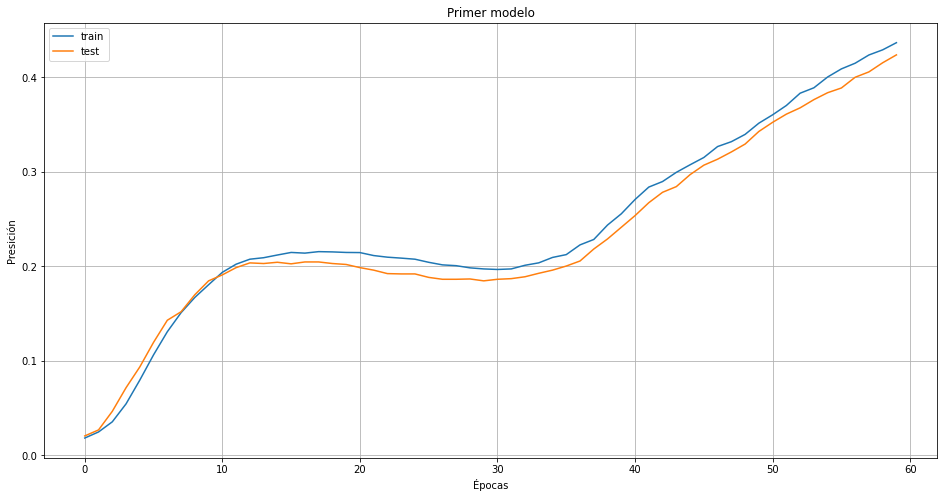

In [89]:
#Creamos el gráfico completo
plot = pp.figure(figsize = (10, 15))
historiales = [historial1,historial2,historial3,historial4]

def graficar(historial, titulo):
    fig, ax = pp.subplots(1, 1, figsize=(16, 8))
    ax.plot(historial.history['accuracy'])
    ax.plot(historial.history['val_accuracy'])
    ax.set_title(titulo)
    ax.set_ylabel('Presición')
    ax.set_xlabel('Épocas')
    ax.grid(True)
    ax.legend(['train','test'], loc = 'upper left')
graficar(historial1, "Primer modelo") 

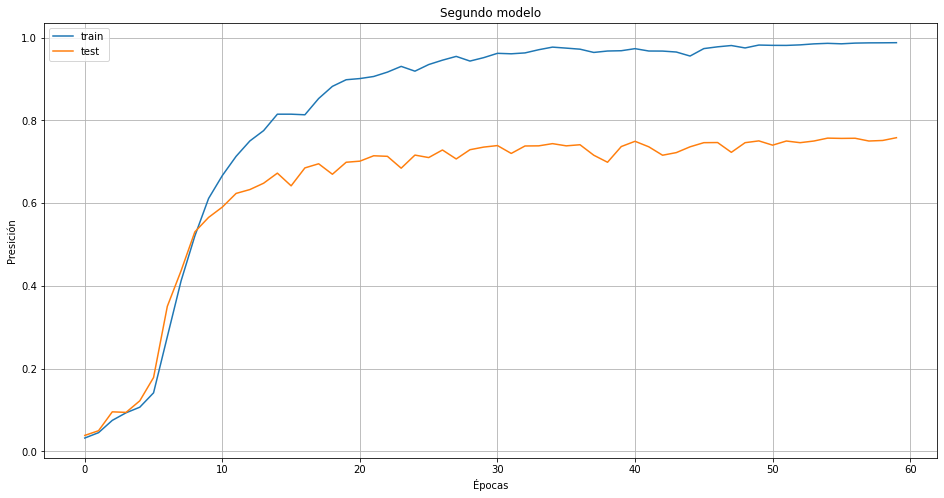

In [90]:
graficar(historial2, "Segundo modelo") 

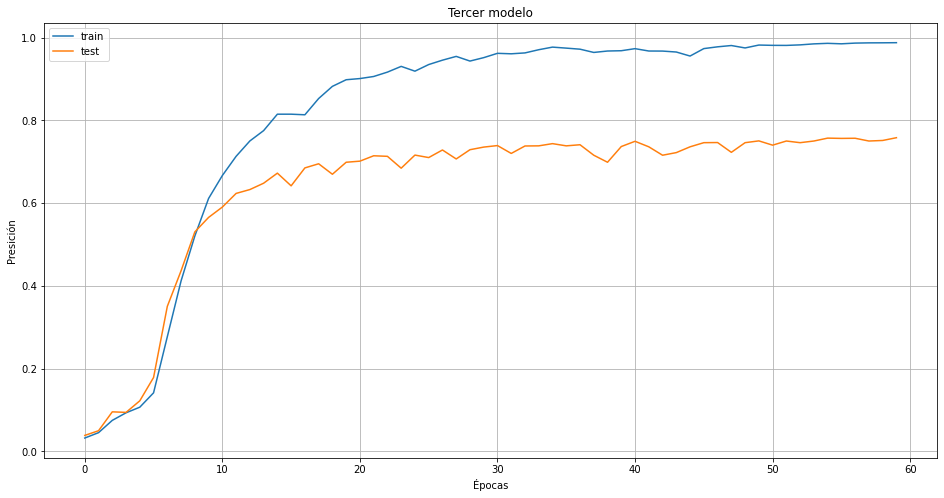

In [91]:
graficar(historial2, "Tercer modelo") 

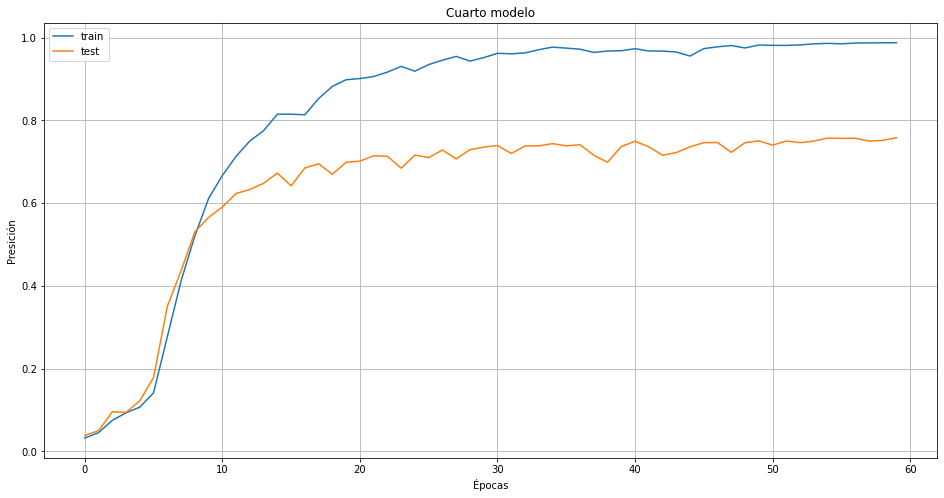

In [92]:
graficar(historial2, "Cuarto modelo") 

### Grafica de pérdida Entrenamiento vs Pruebas

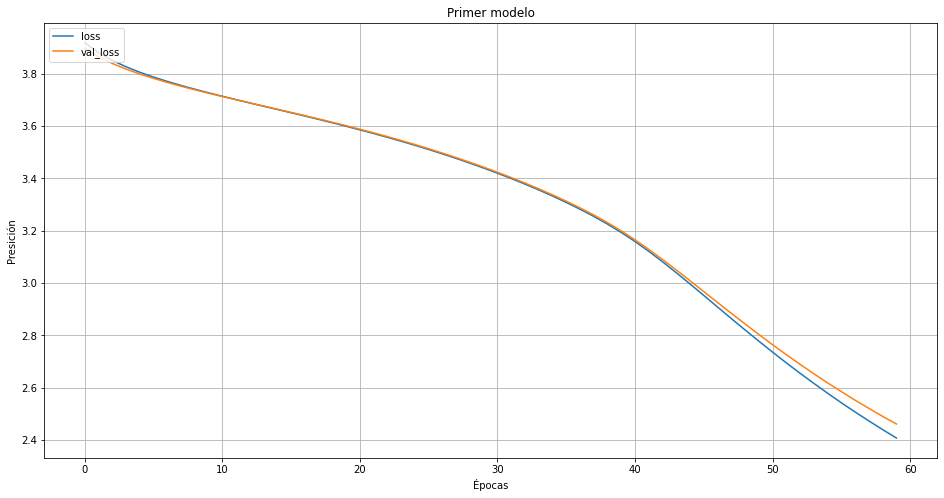

In [93]:
def graficarLoss(historial, titulo):
    fig, ax = pp.subplots(1, 1, figsize=(16, 8))
    ax.plot(historial.history['loss'])
    ax.plot(historial.history['val_loss'])
    ax.set_title(titulo)
    ax.set_ylabel('Presición')
    ax.set_xlabel('Épocas')
    ax.grid(True)
    ax.legend(['loss','val_loss'], loc = 'upper left')
graficarLoss(historial1, "Primer modelo") 

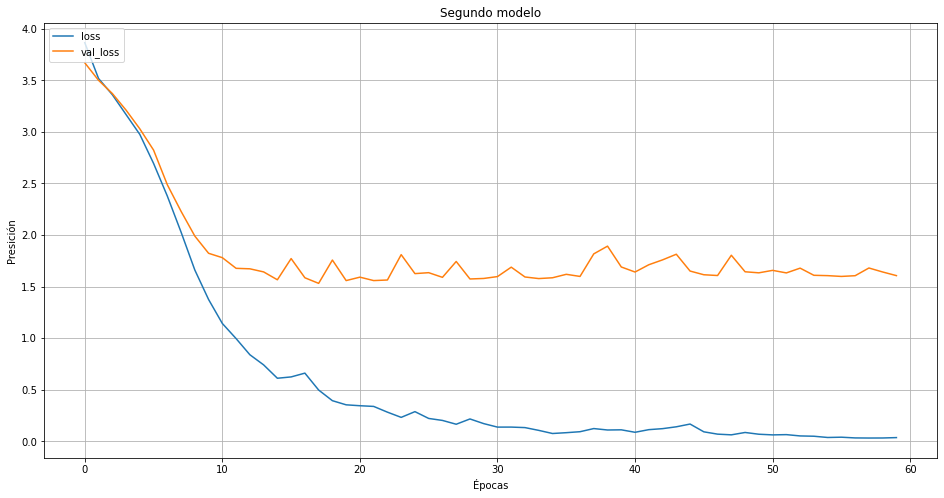

In [94]:
graficarLoss(historial2, "Segundo modelo")  

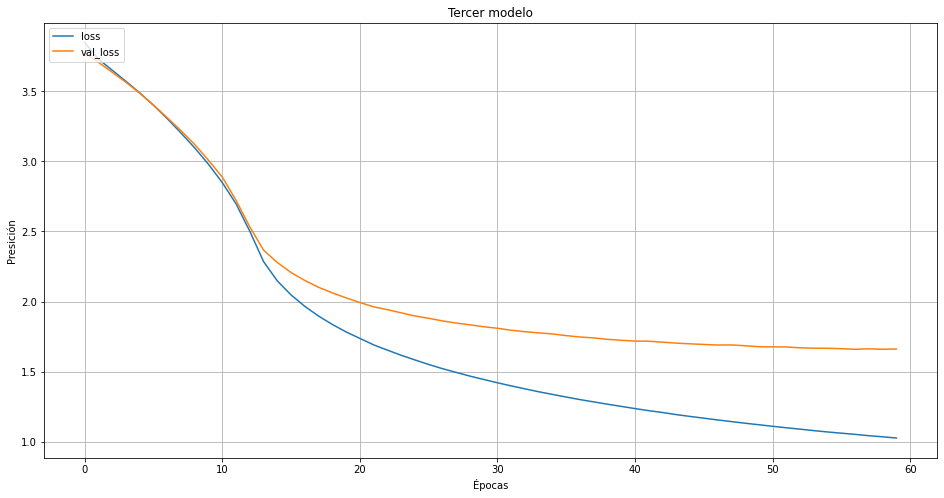

In [95]:
graficarLoss(historial3, "Tercer modelo")  


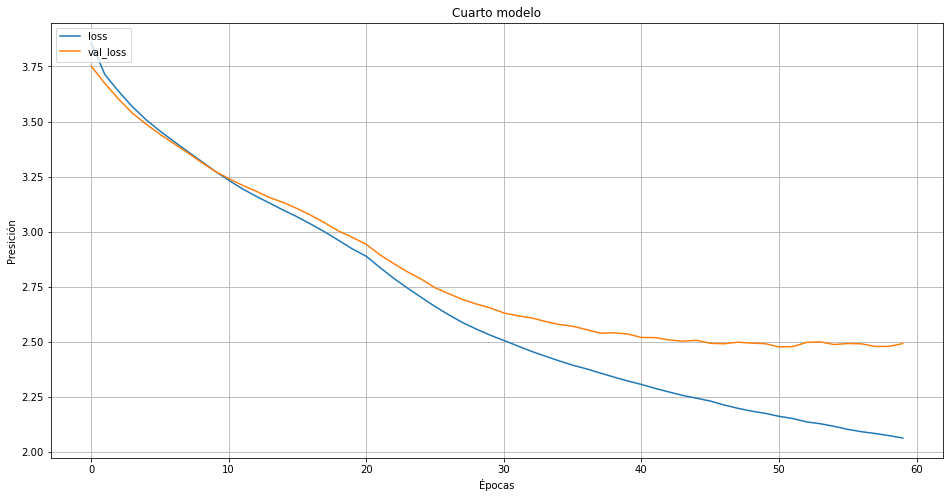

In [96]:
graficarLoss(historial4, "Cuarto modelo")  


### Comparacion

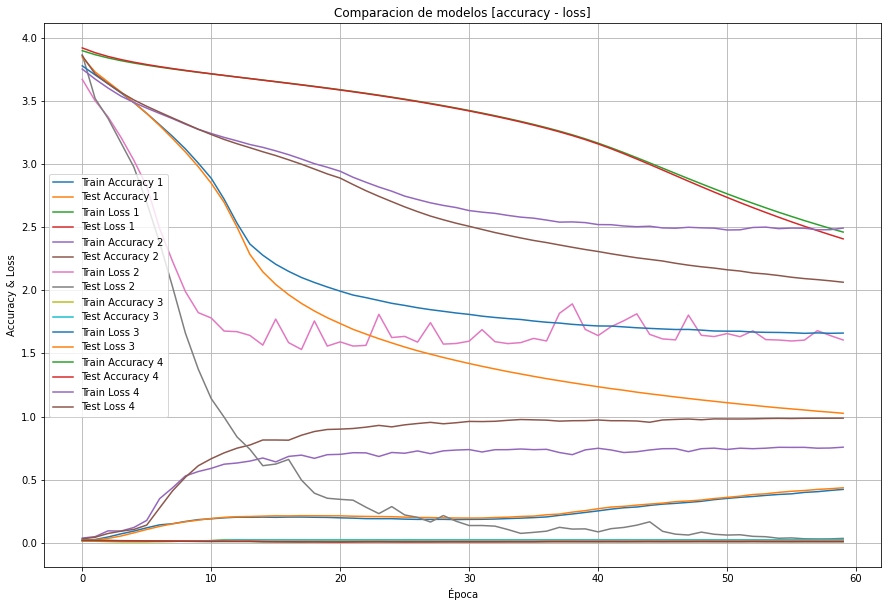

In [97]:
plot = pp.figure(figsize = (15, 10))
pp.plot(historial1.history['val_accuracy'])
pp.plot(historial1.history['accuracy'])
pp.plot(historial1.history['val_loss'])
pp.plot(historial1.history['loss'])

pp.plot(historial2.history['val_accuracy'])
pp.plot(historial2.history['accuracy'])
pp.plot(historial2.history['val_loss'])
pp.plot(historial2.history['loss'])

pp.plot(historial3.history['val_accuracy'])
pp.plot(historial3.history['accuracy'])
pp.plot(historial3.history['val_loss'])
pp.plot(historial3.history['loss'])


pp.plot(historial4.history['val_accuracy'])
pp.plot(historial4.history['accuracy'])
pp.plot(historial4.history['val_loss'])
pp.plot(historial4.history['loss'])

pp.title('Comparacion de modelos [accuracy - loss]')
pp.ylabel('Accuracy & Loss')
pp.xlabel('Época')
pp.legend(['Train Accuracy 1','Test Accuracy 1',  'Train Loss 1','Test Loss 1',
          'Train Accuracy 2','Test Accuracy 2',  'Train Loss 2','Test Loss 2',
          'Train Accuracy 3','Test Accuracy 3',  'Train Loss 3','Test Loss 3',
          'Train Accuracy 4','Test Accuracy 4',  'Train Loss 4','Test Loss 4',])
pp.grid(True)
pp.show()

### Matriz de Confuncion

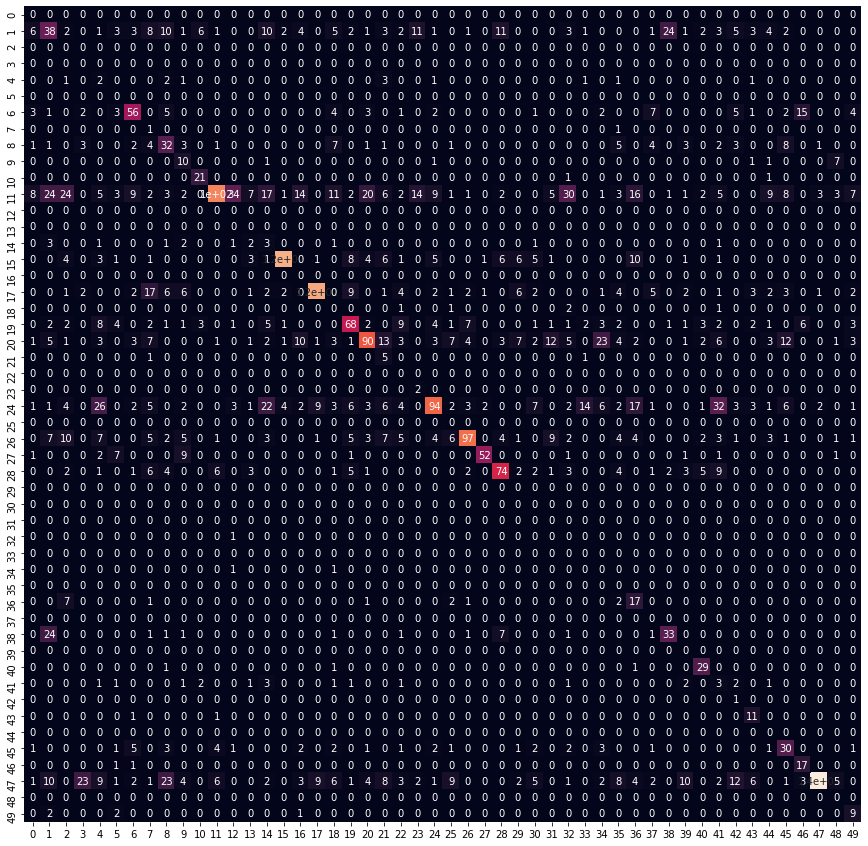

In [98]:
y_predict = modelo1.predict(x_test)
y_predict = np.array(list(map(lambda m: [np.argmax(m)], y_predict)))

matriz_c = confusion_matrix(
    y_predict, 
    y_test,
)

grafico_c = pp.figure(figsize = (15,15))
sb.heatmap(matriz_c, annot = True, cbar = False)
pp.show()

### Red Convolucional

In [99]:
def crearRedConvolucional():
    model = Sequential()
    model.add(Conv2D(6, (3, 3), padding = 'same', activation='relu', input_shape = (150, 150, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(6, (3, 3), padding = 'same', activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))

  
    model.add(Flatten())
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.5))

    return model


In [100]:
modelo = crearRedConvolucional()

modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo.summary()


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 150, 150, 6)       168       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 75, 75, 6)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 75, 75, 6)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 6)         330       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 37, 37, 6)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 37, 37, 6)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8214)            

In [115]:
historial = modelo1.fit(x_train, y_train, batch_size=140,epochs=60,verbose=1,validation_data=(x_test, y_test))


Epoch 1/60
50/50 [==============================] - 0s 9ms/step - loss: 1.3908 - accuracy: 0.6641 - val_loss: 1.6042 - val_accuracy: 0.5947
Epoch 2/60
50/50 [==============================] - 0s 7ms/step - loss: 1.3809 - accuracy: 0.6661 - val_loss: 1.5966 - val_accuracy: 0.5953
Epoch 3/60
50/50 [==============================] - 0s 7ms/step - loss: 1.3716 - accuracy: 0.6659 - val_loss: 1.5897 - val_accuracy: 0.5967
Epoch 4/60
50/50 [==============================] - 0s 7ms/step - loss: 1.3627 - accuracy: 0.6686 - val_loss: 1.5834 - val_accuracy: 0.5990
Epoch 5/60
50/50 [==============================] - 0s 7ms/step - loss: 1.3531 - accuracy: 0.6730 - val_loss: 1.5765 - val_accuracy: 0.5993
Epoch 6/60
50/50 [==============================] - 0s 7ms/step - loss: 1.3441 - accuracy: 0.6716 - val_loss: 1.5697 - val_accuracy: 0.6037
Epoch 7/60
50/50 [==============================] - 0s 7ms/step - loss: 1.3346 - accuracy: 0.6757 - val_loss: 1.5636 - val_accuracy: 0.6007
Epoch 8/60
50/50 [==

50/50 [==============================] - 0s 7ms/step - loss: 0.9710 - accuracy: 0.7704 - val_loss: 1.3370 - val_accuracy: 0.6663
Epoch 60/60
50/50 [==============================] - 0s 7ms/step - loss: 0.9651 - accuracy: 0.7709 - val_loss: 1.3334 - val_accuracy: 0.6707


In [116]:
test_loss3_gd, test_acc3_gd = modelo1.evaluate(x_test, y_test)
print ('PRECISION MODELO CNN: ', test_acc3_gd*100)

94/94 [==============================] - 0s 2ms/step - loss: 1.3334 - accuracy: 0.6707
PRECISION MODELO CNN:  67.06666946411133


In [103]:
target_dire = 'C:/Users/HP/Desktop/revision2/10.1/IA2/Proyecto/ModeloCNN/'
if not os.path.exists(target_dire):
    os.mkdir(target_dire)
modelo.save('C:/Users/HP/Desktop/revision2/10.1/IA2/Proyecto/ModeloCNN/modelo1.h5')
modelo.save_weights('C:/Users/HP/Desktop/revision2/10.1/IA2/Proyecto/ModeloCNN/pesos1.h5')

In [104]:
target_direc = 'C:/Users/HP/Desktop/revision2/10.1/IA2/Proyecto/ModeloCNN/'
if not os.path.exists(target_direc):
    os.mkdir(target_direc)

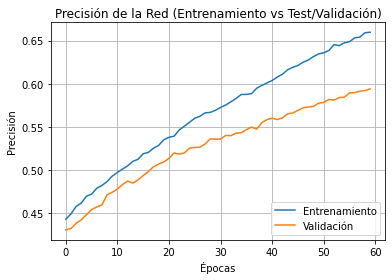

In [106]:
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])
#plt.gcf().set_size_inches(20, 20)
plt.title('Precisión de la Red (Entrenamiento vs Test/Validación)')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento','Validación'], loc='lower right')
plt.grid(True)
plt.savefig("C:/Users/HP/Desktop/revision2/10.1/IA2/Proyecto/ModeloCNN/model1Precision.png") 
plt.show()

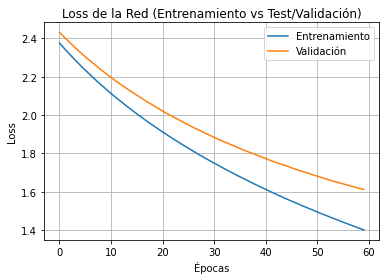

In [107]:
plt.plot(historial.history['loss'])
plt.plot(historial.history['val_loss'])
#plt.gcf().set_size_inches(20, 20)
plt.title('Loss de la Red (Entrenamiento vs Test/Validación)')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento','Validación'], loc='upper right')
plt.grid(True)
plt.savefig("C:/Users/HP/Desktop/revision2/10.1/IA2/Proyecto/ModeloCNN/model1Loss.png") 
plt.show()